# MagicDraw Demo

[INFO] Initialized with seed  : 1
[INFO] Loading sample images...


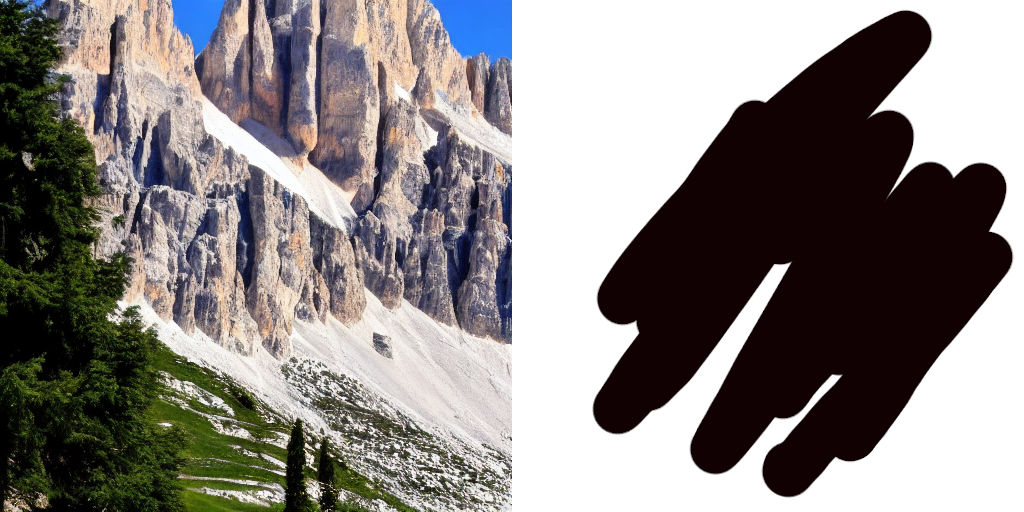

In [1]:
import sys
import warnings

sys.path.append('../src')
warnings.filterwarnings('ignore')

import torchvision.transforms as T
from PIL import Image
from diffusers.utils import make_image_grid

from util import seed_everything
from model import MagicDraw, FastMagicDraw


seed = 1
device = 3

device = f'cuda:{device}'
seed_everything(seed)
print(f'[INFO] Initialized with seed  : {seed}')

print('[INFO] Loading sample images...') 
background = Image.open('../assets/dolomites.png')
mask = Image.open('../assets/brush.png')
display(make_image_grid([background, mask], 1, 2))

### Simple demonstration with a DDIM sampler

In [2]:
drawer = MagicDraw(device, sd_version='1.5')

[INFO] Loading Stable Diffusion...


Loading checkpoint shards: 100%|██████████████████████████| 2/2 [00:03<00:00,  1.67s/it]


[INFO] Model is loaded!


100%|███████████████████████████████████████████████████| 50/50 [00:08<00:00,  5.92it/s]


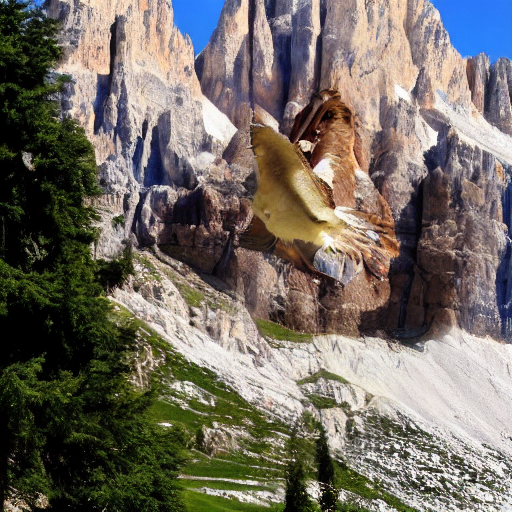

In [3]:
img = drawer(
    background=background,
    masks=mask,
    prompts='a cool-looking flying eagle',
    height=512,
    width=512,
    num_inference_steps=50,
    guidance_scale=1.0,
    mask_std=8.0,
    mask_strength=1.0,
)

display(img)

### Faster editing with LCM LoRA

In [4]:
drawer = FastMagicDraw(device, sd_version='1.5')

[INFO] Loading Stable Diffusion...


Loading pipeline components...: 100%|█████████████████████| 7/7 [00:01<00:00,  4.81it/s]


[INFO] Model is loaded!


100%|█████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.82it/s]


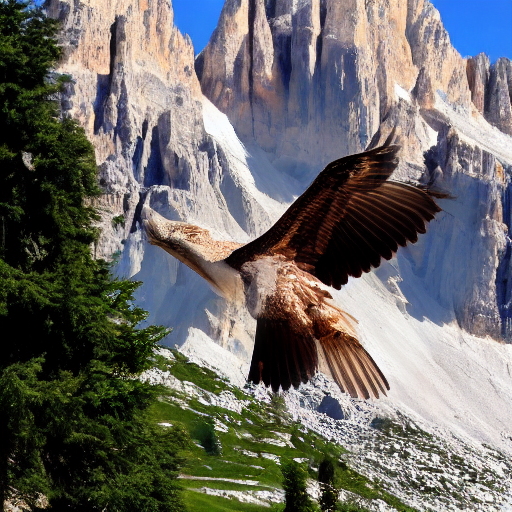

In [5]:
img = drawer(
    background=background,
    masks=mask,
    prompts='a cool-looking flying eagle',
    height=512,
    width=512,
    num_inference_steps=4,
    guidance_scale=1.0,
    mask_std=8.0,
    mask_strength=1.0,
)

display(img)

### Faster editing with SDXL-Turbo